In [1]:
import os
import numpy as np
from astropy.table import Table, vstack, join
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib import patches
from matplotlib import rcParams
rcParams["xtick.labelsize"] = 13
rcParams["ytick.labelsize"] = 13

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter
font = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 14}

from scipy.stats import linregress

# Comparison of our binary fraction results with the literature

## Figure 9: Comparison of $f_b$ with Niu+2020, Jahav+2021, Li & Shao 2020, and LISC

Read the data (already cross-matched):

In [24]:
our_Niu    = Table.read("data/our_catalogue_eight_common_Niu_all_values_allcols.fits")
our_Jadhav = Table.read("data/our_catalogue_nineteen_common_Jadhavall_values_allcols.fits")
our_Li     = Table.read("data/our_catalogue_seven_common_Li_all_values_comp_allcols.fits")
our_LiSC   = Table.read("data/our_catalogue_98_common_Li2022LISC_all_values.fits")

### a) Niu+2020
The 8 we have in common with Niu et al 2020. They look at different mass ranges as well as $q$ ranges.

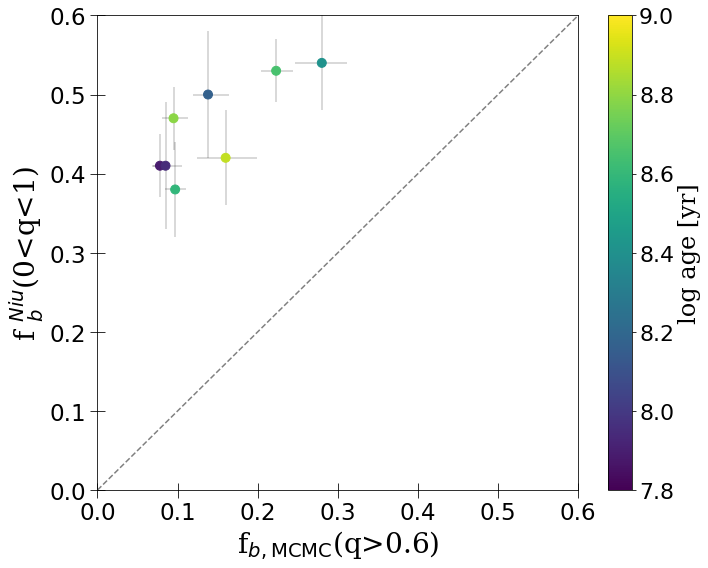

In [29]:
xlim= 0.6

fig = plt.figure(figsize=(10,8))
ax  = plt.subplot(111)
plt.xticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.yticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.xlim(0.0,xlim)
plt.ylim(0.0,xlim)
ax.tick_params(which="major", direction='inout', length=15.)
ax.tick_params(which="minor", direction='inout', length=11.)
ax.set_xlabel(r"f$_{b, \rm MCMC}$(q>0.6)", fontsize=28, fontdict=font)
ax.set_ylabel(r"f $_{b}^{Niu}$(0<q<1)", fontsize=28, fontdict=font)

# Data
plt.errorbar(our_Niu["fb_50"], our_Niu["f_bin_Niu_table3"], c="k",
             xerr=[our_Niu["fb_sigl"],our_Niu["fb_sigu"]],
             yerr=[our_Niu["error_f_bin_Niu_table3"],our_Niu["error_f_bin_Niu_table3"]],
             fmt='none', capsize=None, alpha=0.2,  zorder=0)
sc = ax.scatter(our_Niu["fb_50"], our_Niu["f_bin_Niu_table3"], marker="o",
                c=our_Niu["AgeNN_1"], cmap="viridis", vmin=7.8, vmax=9.0, s=80, label="_nolegend_")

# Colour bar
cb = plt.colorbar(sc)
cb.set_label(r"log age [yr]", fontsize=24, fontdict=font)
cb.ax.tick_params(labelsize=22) 

# Linear fit:
xpts_linearfit = np.linspace(0.0, xlim, 1000)

# Equality line
plt.plot(xpts_linearfit, xpts_linearfit, color="grey", ls="--", linewidth=1.5,
         label=r"f $_{b}^{Niu}$(0<q<1) = f$_{b, \rm MCMC}$(q$>0.6$)")

#plt.legend(loc="lower right", fontsize=21, framealpha=0.0, edgecolor="white")
plt.tight_layout()
plt.savefig("im/comp_8_Niu.png", dpi=300)

### b) Jadhav+2021
There are 19 OCs we have in common with Jadhav et al 2021, again with different $q$ ranges and unknown mass ranges.

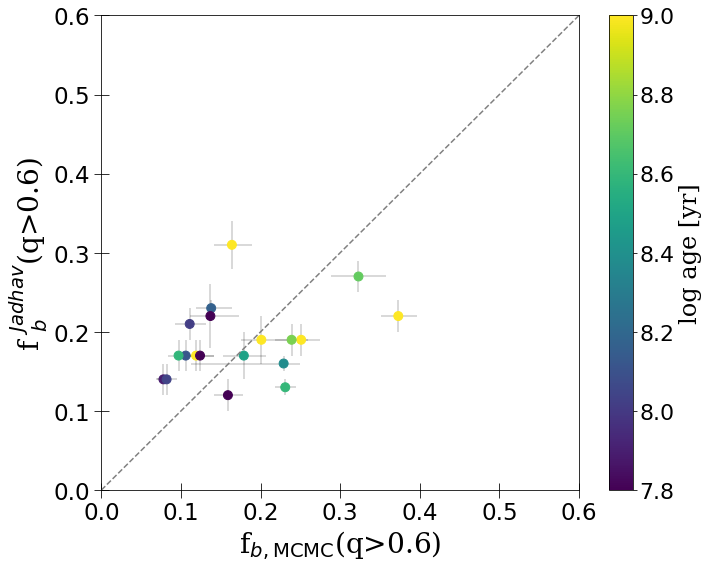

In [30]:
fig = plt.figure(figsize=(10,8))
ax  = plt.subplot(111)
plt.xticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.yticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.xlim(0.0,xlim)
plt.ylim(0.0,xlim)
ax.tick_params(which="major", direction='inout', length=15.)
ax.tick_params(which="minor", direction='inout', length=11.)
ax.set_xlabel(r"f$_{b, \rm MCMC}$(q>0.6)", fontsize=28, fontdict=font)
ax.set_ylabel(r"f $_{b}^{ Jadhav}$(q>0.6)", fontsize=28, fontdict=font)
# Data
plt.errorbar(our_Jadhav["fb_50"], our_Jadhav["BF_greater_06_Jadhav"], c="k",
             xerr=[our_Jadhav["fb_sigl"],our_Jadhav["fb_sigu"]],
             yerr=[our_Jadhav["error_BF_greater_06_Jadhav"],our_Jadhav["error_BF_greater_06_Jadhav"]],
             fmt='none', capsize=None, alpha=0.2,  zorder=0)
sc = ax.scatter(our_Jadhav["fb_50"], our_Jadhav["BF_greater_06_Jadhav"], marker="o",
                c=our_Jadhav["AgeNN_1"], cmap="viridis", vmin=7.8, vmax=9.0, s=80, label="_nolegend_")

# Colour bar
cb = plt.colorbar(sc)
cb.set_label(r"log age [yr]", fontsize=24, fontdict=font)
cb.ax.tick_params(labelsize=22) 

# Linear fit:
xpts_linearfit = np.linspace(0.0, xlim, 1000)

# Equality line
plt.plot(xpts_linearfit, xpts_linearfit, color="grey", ls="--", linewidth=1.5,
         label=r"f $_{b}^{Jadhav}(q>0.6)$ = f$_{b, \rm MCMC}$(q$>0.6$)")

#plt.legend(loc="lower right", fontsize=21, framealpha=0.0, edgecolor="white")
plt.tight_layout()
plt.savefig("im/comp_19_Jadhav.png", dpi=300)

### c) Li & Shao (2020) 
We have 7 OCs in common with Li&Shao 2022 (MiMO), with different q ranges and unknown mass ranges.

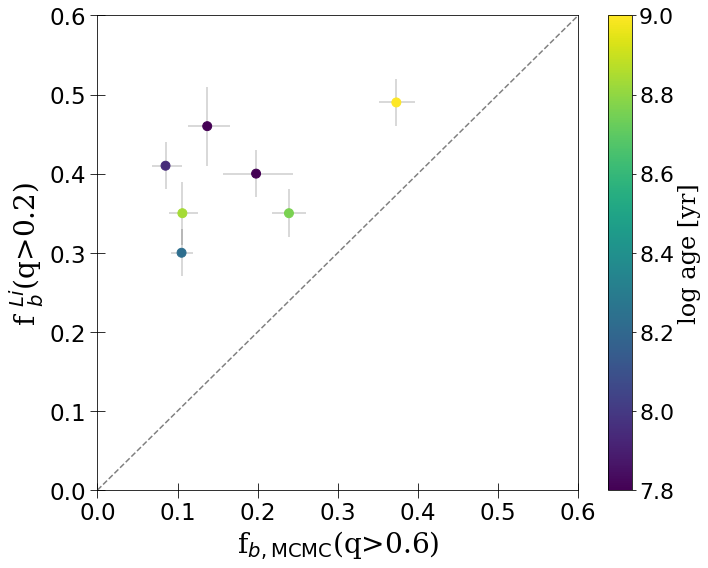

In [31]:
fig = plt.figure(figsize=(10,8))
ax  = plt.subplot(111)
plt.xticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.yticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.xlim(0.0,xlim)
plt.ylim(0.0,xlim)
ax.tick_params(which="major", direction='inout', length=15.)
ax.tick_params(which="minor", direction='inout', length=11.)
ax.set_xlabel(r"f$_{b, \rm MCMC}$(q>0.6)", fontsize=28, fontdict=font)
ax.set_ylabel(r"f $_{b}^{ Li}$(q>0.2)", fontsize=28, fontdict=font)

# Data
plt.errorbar(our_Li["fb_50"], our_Li["BF_Li"], c="k",
             xerr=[our_Li["fb_sigl"],our_Li["fb_sigu"]],
             yerr=[our_Li["BF_Li_error"],our_Li["BF_Li_error"]],
             fmt='none', capsize=None, alpha=0.2,  zorder=0)
sc = ax.scatter(our_Li["fb_50"], our_Li["BF_Li"], marker="o",
                c=our_Li["AgeNN_1"], cmap="viridis", vmin=7.8, vmax=9.0, s=80, label="_nolegend_")

# Colour bar
cb = plt.colorbar(sc)
cb.set_label(r"log age [yr]", fontsize=24, fontdict=font)
cb.ax.tick_params(labelsize=22) 

# Linear fit:
xpts_linearfit = np.linspace(0.0, xlim, 1000)

# Equality line
plt.plot(xpts_linearfit, xpts_linearfit, color="grey", ls="--", linewidth=1.5,
         label=r"f $_{b}^{Li}$(q>0.2) = f$_{b, \rm MCMC}$(q$>0.6$)")

#plt.legend(loc="lower right", fontsize=21, framealpha=0.0, edgecolor="white")
plt.tight_layout()
plt.savefig("im/comp_7_Li.png", dpi=300)

### d) LISC
There are 98 OCs we have in common with Li+2022 (LISC catalogue), with different $q$ ranges and unknown mass ranges.

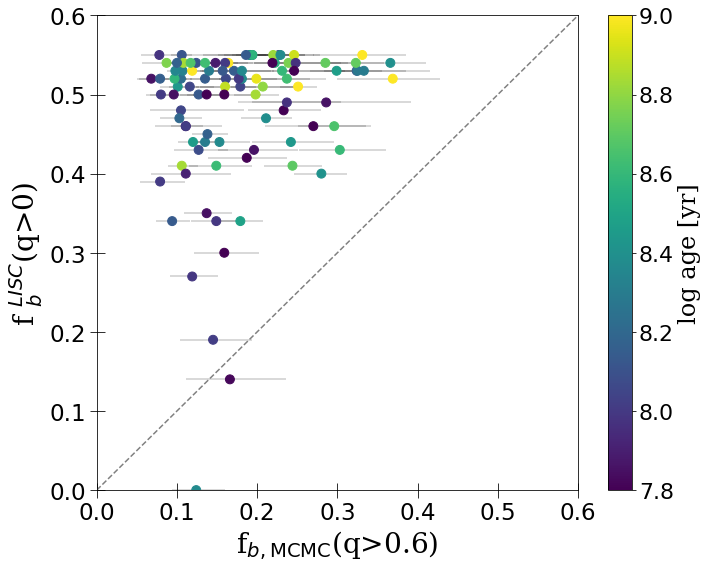

In [32]:
fig = plt.figure(figsize=(10,8))
ax  = plt.subplot(111)
plt.xticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.yticks(np.arange(0.0, 0.8, step=0.1), fontsize=23)
plt.xlim(0.0,xlim)
plt.ylim(0.0,xlim)
ax.tick_params(which="major", direction='inout', length=15.)
ax.tick_params(which="minor", direction='inout', length=11.)
ax.set_xlabel(r"f$_{b, \rm MCMC}$(q>0.6)", fontsize=28, fontdict=font)
ax.set_ylabel(r"f $_{b}^{ LISC}$(q>0)", fontsize=28, fontdict=font)

# Data
plt.errorbar(our_LiSC["fb_50"], our_LiSC["f_bin"], c="k",
             xerr=[our_LiSC["fb_sigl"],our_LiSC["fb_sigu"]],  # LISC provides no error for f_bin yerr=[our_LiSC["BF_Li_error"],our_LiSC["BF_Li_error"]],
             fmt='none', capsize=None, alpha=0.2,  zorder=0)
sc = ax.scatter(our_LiSC["fb_50"], our_LiSC["f_bin"], marker="o",
                c=our_LiSC["AgeNN_1"], cmap="viridis", vmin=7.8, vmax=9.0, s=80, label="_nolegend_")

# Colour bar
cb = plt.colorbar(sc)
cb.set_label(r"log age [yr]", fontsize=24, fontdict=font)
cb.ax.tick_params(labelsize=22) 

# Linear fit:
xpts_linearfit = np.linspace(0.0, xlim, 1000)

# Equality line
plt.plot(xpts_linearfit, xpts_linearfit, color="grey", ls="--", linewidth=1.5,
         label=r"f $_{b}^{LISC}$(q>0) = f$_{b, \rm MCMC}$(q$>0.6$)")

#plt.legend(loc="lower right", fontsize=21, framealpha=0.0, edgecolor="white")
plt.tight_layout()
plt.savefig("im/comp_98_LISC.png", dpi=300)